In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

In [2]:
def cat_to_num(data):
    cat_vars  = data.loc[:, common_de.dtypes == np.object].columns.to_list()
    for var in cat_vars:
        cat_list = 'var '+'_'+ var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1    = data.join(cat_list)
        data     = data1
    data_vars    = data.columns.values.tolist()
    to_keep      = [i for i in data_vars if i not in cat_vars]
    data_final   = data[to_keep]
    data_final   = data_final.replace(['o','t','ot'],1)
    data_final   = data_final.replace(['unknown', 'Yes'], 
                     [0,1])
    data_final   = data_final.fillna(0)
    data_final   = data_final.replace('yes',1)
    data_final   = data_final.replace('TF',1)
    data_final   = data_final.replace('No',0)
    return data_final

In [3]:
%store -r data_final

In [4]:
%store -r common_de

In [5]:
LUAD    = common_de.query('sample =="LUAD"')

In [6]:
df_luad = cat_to_num(LUAD)

In [7]:
data_final

,logFC,types,Meth_Mean,sphase_mean_FC,score,Pathway,risk_alelle_freq,proximal_cancer_driver_No,proximal_cancer_driver_Yes,proximal_drug_target_No,negative_correlated_methylation_No,negative_correlated_methylation_Yes,positive_correlated_methylation_No,positive_correlated_methylation_Yes,promoter_methylated_No,promoter_methylated_Yes,sample_BRCA,sample_COAD,sample_ESCA,sample_HNSC,sample_KICH,sample_KIRC,sample_KIRP,sample_LIHC,sample_LUAD,sample_LUSC,sample_PAAD,sample_PRAD,sample_STAD,sample_THCA,mechanism_Enhancer,mechanism_Enhancer_ TF,mechanism_No,mechanism_TF,mechanism_Variant,mechanism_Variant_ Enhancer,mechanism_Variant_ Enhancer_ TF,mechanism_Variant_ TF,functional_Cell Growth,functional_EMT,functional_EMT_ Cell Growth,functional_EMT_ autophagy/Apoptosis_ Cell Growth,functional_No,functional_Survival_ Cell Growth,functional_Survival_ EMT,functional_Survival_ EMT_ Cell Growth,functional_Survival_ EMT_ autophagy/Apoptosis,functional_Survival_ EMT_ autophagy/Apoptosis_ Cell Growth,functional_Survival_ autophagy/Apoptosis,functional_Survival_ autophagy/Apoptosis_ Cell Growth,functional_autophagy/Apoptosis,functional_autophagy/Apoptosis_ Cell Growth,clinical_Metastasis_ Circulating_ Recurrence_ Drug,clinical_Metastasis_ Recurrence,clinical_Metastasis_ Recurrence_ Circulating,clinical_Metastasis_ Recurrence_ Drug,clinical_No,SNPS_No,SNPS_Yes
0,-1.277354,0,0.0,0.0,0.0,0,0.0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.988639,0,0.0,0.0,0.0,0,0.0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-1.049325,0,0.0,0.0,0.0,0,0.0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.772376,0,0.0,0.0,0.0,0,0.0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,-0.581519,0,0.0,0.0,0.0,0,0.0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49631,-0.670712,0,0.0,0.0,0.0,0,0.0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
49632,-0.968157,0,0.0,0.0,0.0,0,0.0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
49633,-0.778585,0,0.0,0.0,0.0,0,0.0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
49634,-0.642760,0,0.0,0.0,0.0,0,0.0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [8]:
y = data_final['Pathway']
x = data_final.drop(['Pathway'],axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

Opening the balanced x and y datasets

In [45]:
%store -r balanced_X_without_rfe
%store -r balanced_y
#balanced_y = pd.DataFrame(balanced_y)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(balanced_X_without_rfe, balanced_y, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
# Define the model and parameters
# define grid search
# summarize results

In [ ]:
# define model and parameters
model  = SVC()
kernel = ['poly', 'rbf', 'sigmoid','linear']
C      = [50, 10, 1.0, 0.1, 0.01]
gamma  = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds  = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
best1  = {}
for mean, stdev, param in zip(means, stds, params):
     print("%f (%f) with: %r" % (mean, stdev, param))

In [47]:
clf    = svm.SVC(kernel='rbf', C=1) # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10)

In [49]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7127614169867691


In [50]:
# Model Precision: The percentage of results which are relevant? 
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))
# Model Recall: what percentage of relevant results correctly classified by the model?
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))

Precision: 0.804141634029235
Recall: 0.7127614169867691


Accuracy:  0.7127614169867691


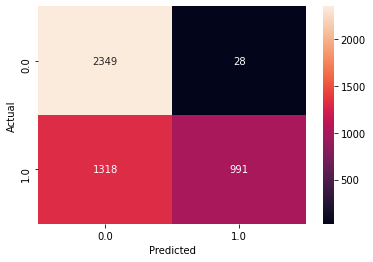

In [51]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
#plt.savefig('5samples_down_regulated.png')
plt.show()

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2349   28]
 [1318  991]]
              precision    recall  f1-score   support

         0.0       0.64      0.99      0.78      2377
         1.0       0.97      0.43      0.60      2309

    accuracy                           0.71      4686
   macro avg       0.81      0.71      0.69      4686
weighted avg       0.80      0.71      0.69      4686



In [56]:
y_train_pred = clf.decision_function(X_train)    
y_test_pred  = clf.decision_function(X_test)
"""
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred,pos_label='your_label')
"""
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred,pos_label='your_label')


/home/alva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:705: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = (y_true == pos_label)


TypeError: 'bool' object is not subscriptable

In [ ]:
Hallo zusammen
Mein Name ist Alva James, ich möchte meine Tochter Alisa James zu Ihrer Kita schicken. Sie wurde am 2. November 2020 geboren. Jetzt ist sie sieben Monate alt. Ich arbeite am Hasso Platner Institut. Bitte darf ich wissen, haben Sie einen Platz für sie ab August oder später im November dieses Jahres in Ihrer Kita?

In [ ]:
plt.grid()
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [49]:
from sklearn.metrics import plot_roc_curve

classifiers = [log_reg, decision_tree, decision_forest]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

NameError: name 'log_reg' is not defined

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

h = .02  # step size in the mesh

names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="sigmoid", gamma=2)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

[(array([[ 0.03159499,  0.98698776],
         [ 2.11509784, -0.04624397],
         [ 0.88248972, -0.07575606],
         [-0.0551441 , -0.03733246],
         [ 0.82954503, -0.53932149],
         [ 2.11285708,  0.66208353],
         [ 0.5696927 ,  0.33744136],
         [ 0.95217454, -0.75307471],
         [-0.02922115,  0.39287336],
         [ 1.71579557,  0.36069454],
         [-0.27883014,  0.61420539],
         [ 2.00344509, -0.3091496 ],
         [ 1.50009616, -0.74636376],
         [ 1.22540835,  1.19793017],
         [ 0.46730819,  0.54703192],
         [-0.36653222,  1.11971633],
         [ 0.30124459,  1.23315697],
         [ 0.30430746,  0.82373935],
         [-0.23712492,  0.77876034],
         [ 1.16339832,  0.55290238],
         [-0.59702417,  0.6572361 ],
         [ 0.46356735, -0.1951543 ],
         [ 0.68451111,  0.75287685],
         [ 0.70515699, -0.45892444],
         [-0.65805008, -0.12944211],
         [-0.74662946, -0.3829632 ],
         [ 0.60585226,  0.31252842],
 

In [105]:
i = 1
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [ ]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [ ]:
y = df_luad['y']
x = df_luad.drop(['y'],axis=1)
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc     = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()